Garma, L. D., & Osório, N. S. (Submitted). Demystifying Dimensionality Reduction Techniques in the 'Omics' Era: A Practical Approach for Biological Science Students. *Corresponding authors: leonardo.garma@cnio.eski.se, nosorio@med.uminho.pt

# Instalation

In [ ]:
# When running on Google Colab only scanpy and loompy have to be installed.
# On other machines you might need to install the other modules.
!pip install -U scanpy loompy

In [2]:
# Import the necessary modules every time you restart the notebook
import scanpy as sc
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
import seaborn as sns
import os

# Import the data

In [ ]:
# Download the scRNA-seq data for these examples
!wget https://figshare.com/ndownloader/files/38371136
os.rename('38371136', 'Melms_norm.loom')

# Explore the examples

In [ ]:
adata=sc.read_loom('Melms_norm.loom')

In [ ]:
adata.obs_names=adata.obs.obs_names
adata.var_names=adata.var.var_names

In [ ]:
adata=adata[adata.obs.n_counts>1000].copy()
adata=adata[adata.obs.n_genes>1000].copy()

In [ ]:
np.random.seed(42)
idxA=np.arange(np.sum(adata.obs.cell_type_intermediate=='Airway epithelial cells'))
np.random.shuffle(idxA)
idxA=idxA[0:700]

idxU=np.arange(np.sum(adata.obs.cell_type_intermediate=='AT2'))
np.random.shuffle(idxU)
idxU=idxU[0:700]

idxM=np.arange(np.sum(adata.obs.cell_type_intermediate=='Macrophages'))
np.random.shuffle(idxM)
idxM=idxM[0:700]

idxO=np.arange(np.sum(adata.obs.cell_type_intermediate=='Fibroblasts'))
np.random.shuffle(idxO)
idxO=idxO[0:700]


In [ ]:
sub=adata[adata.obs.cell_type_intermediate=='AT2'][idxU].concatenate([adata[adata.obs.cell_type_intermediate=='Airway epithelial cells'][idxA],
                                                              adata[adata.obs.cell_type_intermediate=='Macrophages'][idxM],
                                                              adata[adata.obs.cell_type_intermediate=='Fibroblasts'][idxO]])

In [ ]:
sub

AnnData object with n_obs × n_vars = 2800 × 34546
    obs: 'File', 'age', 'batch', 'biosample_id', 'cell_type_fine', 'cell_type_intermediate', 'cell_type_main', 'disease', 'disease__ontology_label', 'donor_id', 'group', 'initial_clustering', 'interval_death_symptoms_onset_days', 'intubation_days', 'library_preparation_protocol', 'library_preparation_protocol__ontology_label', 'mt_frac', 'n_counts', 'n_genes', 'obs_names', 'organ', 'organ__ontology_label', 'pmi_h', 'recorded_ethnicity', 'recorded_race', 'sex', 'species', 'species__ontology_label'
    var: 'var_names'

In [ ]:
sc.pp.highly_variable_genes(sub, flavor='seurat', n_top_genes=1500)

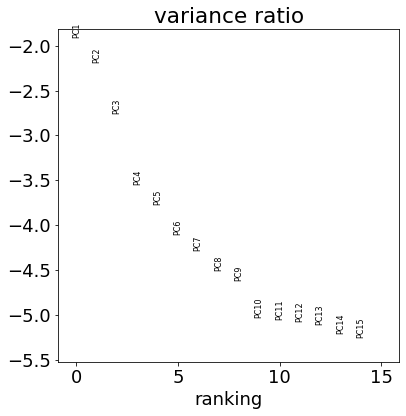

In [ ]:
# Calculate the visualizations
plt.rcParams['figure.figsize']=(6,6) #rescale figures

n_pcs=15
sc.pp.pca(sub, n_comps=n_pcs, use_highly_variable=True, svd_solver='arpack')
sc.pl.pca_variance_ratio(sub,n_pcs, log=True)

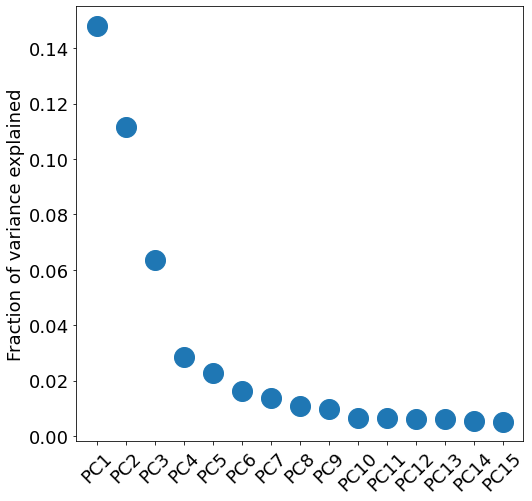

In [ ]:
plt.rcParams['figure.figsize']=(8,8) #rescale figures
plt.rcParams.update({'font.size': 18})
plt.plot(sub.uns['pca']['variance_ratio'][0:15],'o',markersize=20);
plt.ylabel('Fraction of variance explained')
plt.xticks(ticks=np.arange(15),labels=['PC'+i.astype(str) for i in np.arange(16)[1:]],rotation=45);
#plt.xlabel('PC')

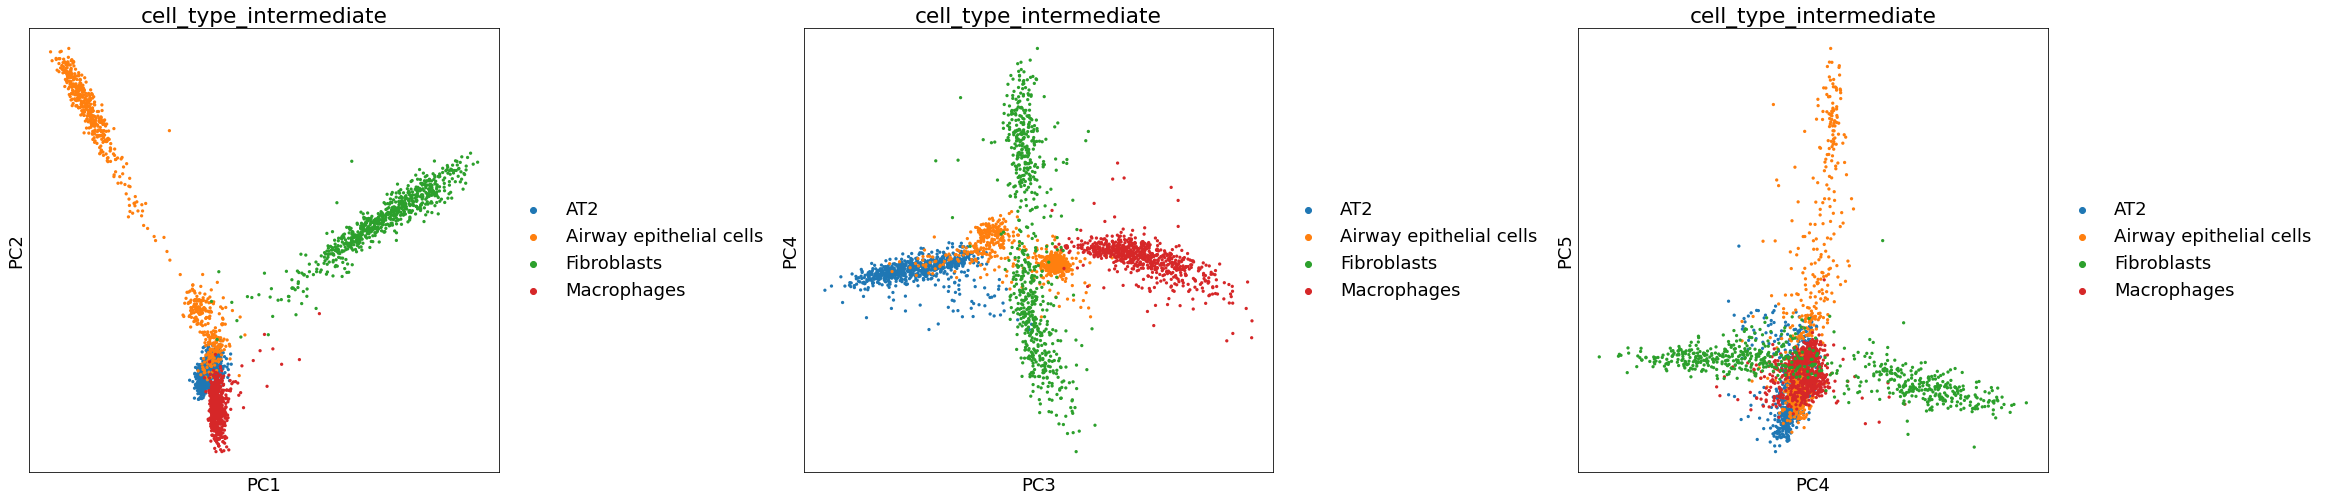

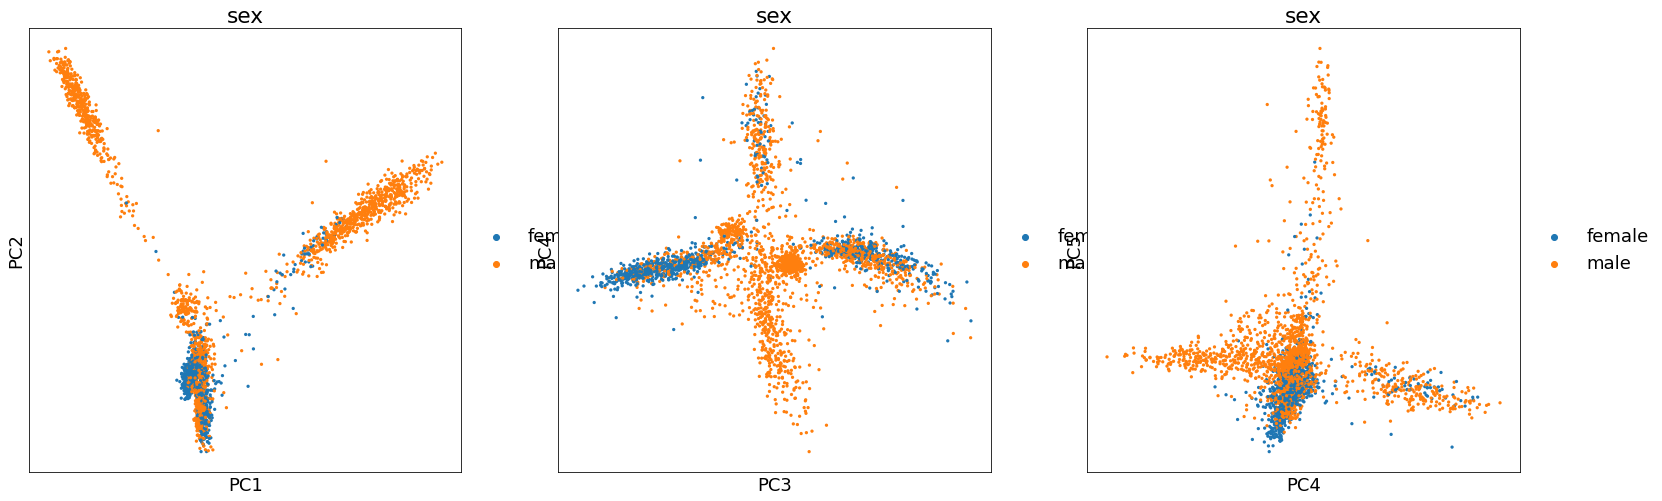

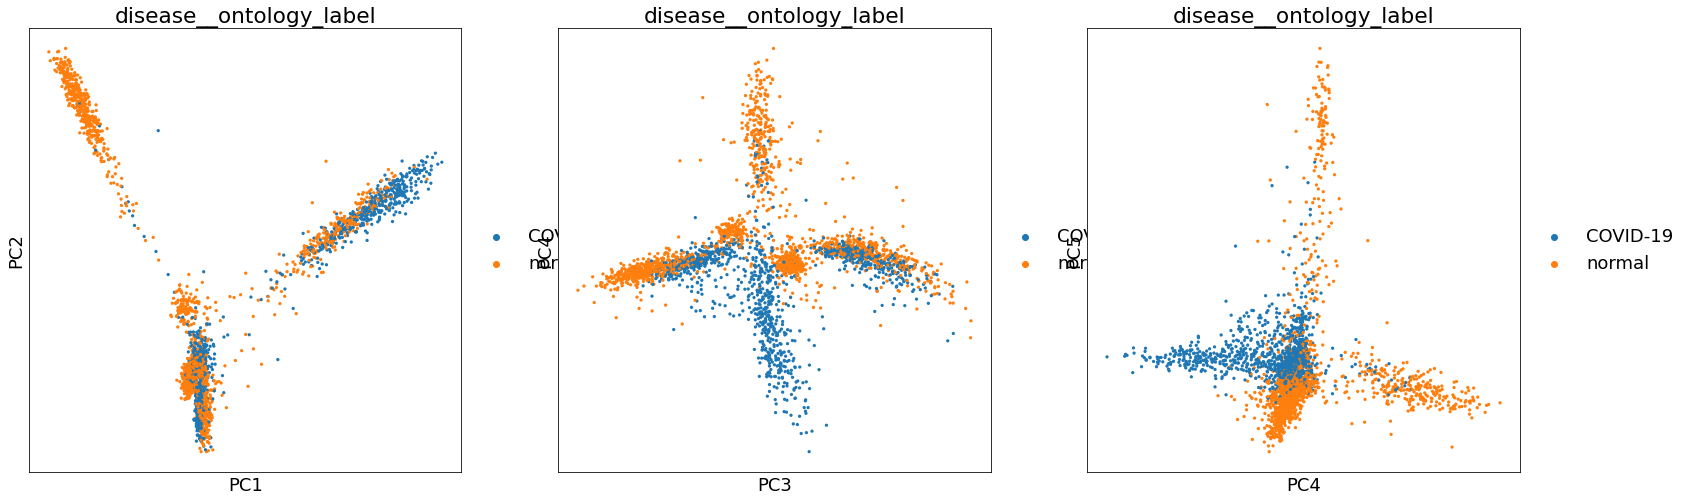

In [ ]:
sc.pl.pca_scatter(sub, color='cell_type_intermediate',components=['1,2','3,4','4,5'],wspace=0.5)
sc.pl.pca_scatter(sub, color='sex',components=['1,2','3,4','4,5'])
sc.pl.pca_scatter(sub, color='disease__ontology_label',components=['1,2','3,4','4,5'])
#sc.pl.umap(adata, color='cellType')
#sc.pl.umap(adata, color='sex')

In [ ]:
%%time
sc.pp.neighbors(sub,n_pcs=10,random_state=42,n_neighbors=2799,metric='cosine')
#sc.tl.umap(adata,random_state=42)

Wall time: 17.8 s


C:\Users\leona\AppData\Local\Temp/ipykernel_19640/2760035913.py:2: FutureWarning: This location for 'distances' is deprecated. It has been moved to .obsp[distances], and will not be accesible here in a future version of anndata.
  ax1=sns.heatmap(sub.uns['neighbors']['distances'].todense(),cmap='Blues')#,yticklabels=sub.obs['CellType'])


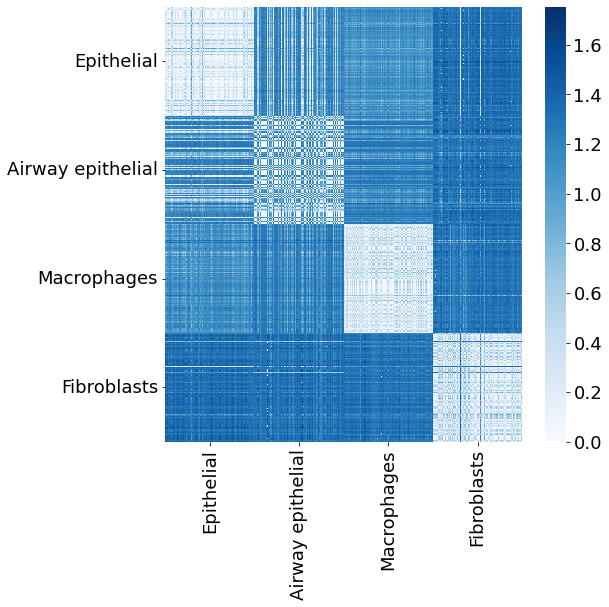

In [ ]:
import seaborn as sns
ax1=sns.heatmap(sub.uns['neighbors']['distances'].todense(),cmap='Blues')#,yticklabels=sub.obs['CellType'])
ax1.set_yticks([350,1050,1750,2450]);
ax1.set_yticklabels(['Epithelial','Airway epithelial','Macrophages','Fibroblasts'],rotation=0);
ax1.set_xticks([350,1050,1750,2450]);
ax1.set_xticklabels(['Epithelial','Airway epithelial','Macrophages','Fibroblasts'],rotation=90);


In [ ]:
idx=np.arange(len(sub))
np.random.shuffle(idx)
A_r=sub.uns['neighbors']['distances'].todense()[idx,:]
A_r=A_r[:,idx]

C:\Users\leona\AppData\Local\Temp/ipykernel_19640/2918354532.py:3: FutureWarning: This location for 'distances' is deprecated. It has been moved to .obsp[distances], and will not be accesible here in a future version of anndata.
  A_r=sub.uns['neighbors']['distances'].todense()[idx,:]


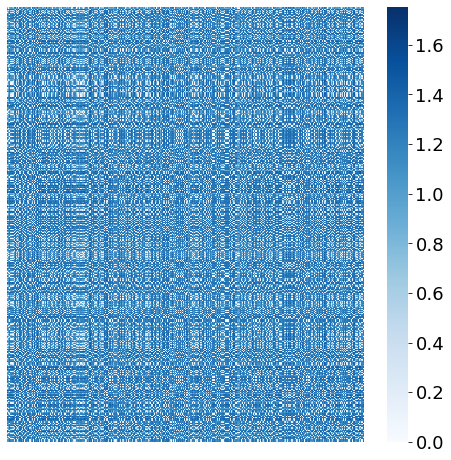

In [ ]:

import seaborn as sns
ax1=sns.heatmap(A_r,cmap='Blues')#,yticklabels=sub.obs['CellType'])
ax1.set_yticks([]);
#ax1.set_yticklabels(['Astrocytes','Microglia','Mural','OPC','Endothelial'],rotation=0);
ax1.set_xticks([]);
#ax1.set_xticklabels(['Astrocytes','Microglia','Mural','OPC','Endothelial'],rotation=45);

In [ ]:
from sklearn.manifold import MDS
embedding = MDS(n_components=2)


In [ ]:
X=A_r#sub.uns['neighbors']['distances'].todense()
#X=np.abs(X-np.max(X))
X_transformed = embedding.fit_transform(X)

C:\Users\leona\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:441: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


In [ ]:
X.shape

(2800, 2800)

In [ ]:
dfMDS=pd.DataFrame(X_transformed,columns=['MDS1','MDS2'])
dfMDS['Type']=sub.obs.cell_type_intermediate.values[idx]#[0::3]

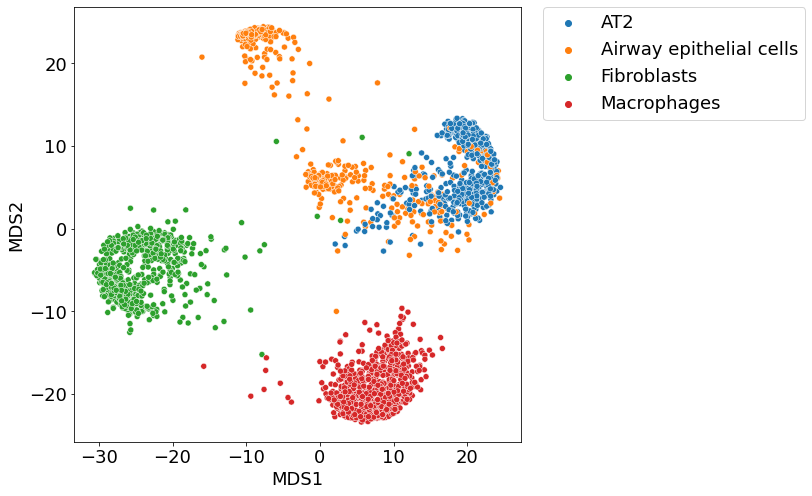

In [ ]:
sns.scatterplot(data=dfMDS,x='MDS1',y='MDS2',hue='Type')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
